In [59]:
import sqlite3
import pandas as pd
import numpy as np
# Data was collected from https://www.kaggle.com/datasets/nolanbconaway/pitchfork-data

# Read the SQL and clean data
con = sqlite3.connect('pitchfork.sqlite')
df = pd.read_sql('SELECT * FROM reviews', con)
genres = pd.read_sql('SELECT * FROM genres', con)
df.reset_index(drop=True,inplace=True)
genres.reset_index(drop=True,inplace=True)
con.close()
df.drop(["reviewid", "url", "best_new_music", "pub_weekday", "pub_day","pub_month"], inplace=True,axis=1)
data = pd.concat([genres,df],axis=1)
data.dropna(inplace=True)

joe tangari           748
stephen m. deusner    634
ian cohen             600
brian howe            456
mark richardson       432
Name: author, dtype: int64

In [73]:
data

,reviewid,genre,title,artist,score,author,author_type,pub_date,pub_year
0,22703,electronic,mezzanine,massive attack,9.3,nate patrin,contributor,2017-01-08,2017.0
1,22721,metal,prelapsarian,krallice,7.9,zoe camp,contributor,2017-01-07,2017.0
2,22659,rock,all of them naturals,uranium club,7.3,david glickman,contributor,2017-01-07,2017.0
3,22661,rock,first songs,"kleenex, liliput",9.0,jenn pelly,associate reviews editor,2017-01-06,2017.0
4,22725,electronic,new start,taso,8.1,kevin lozano,tracks coordinator,2017-01-06,2017.0
...,...,...,...,...,...,...,...,...,...
18382,6703,pop/r&b,mission: control!,burning airlines,8.4,brent dicrescenzo,contributor,1999-02-16,1999.0
18383,6703,folk/country,all-in,arling and cameron,8.0,jason josephes,contributor,1999-02-11,1999.0
18385,4825,rock,sam prekop,sam prekop,8.9,ryan schreiber,editor-in-chief,1999-02-09,1999.0
18386,4825,metal,peel session,autechre,7.7,ryan schreiber,editor-in-chief,1999-02-09,1999.0


In [44]:
data["author_type"].value_counts()

contributor                  11013
executive editor               432
senior editor                  420
senior staff writer            404
contributing editor            190
associate staff writer         100
editor-in-chief                 78
deputy news editor              71
tracks coordinator              50
associate reviews editor        37
associate editor                34
assistant editor                16
associate features editor       11
news director                    5
managing editor                  3
Name: author_type, dtype: int64

# Does Pitchfork contributors have a bias towards certain music?

In [45]:
data["score"].describe()

count    12864.000000
mean         7.053109
std          1.253503
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

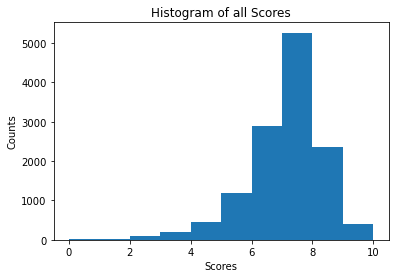

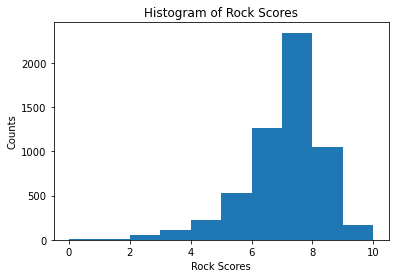

Rock Description

count    5756.000000
mean        7.028509
std         1.283133
min         0.000000
25%         6.500000
50%         7.300000
75%         7.800000
max        10.000000
Name: score, dtype: float64


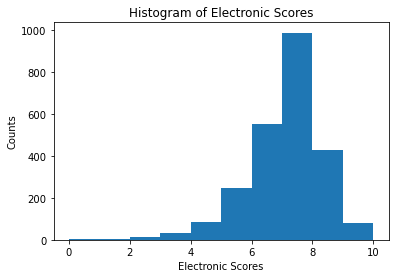

Electronic Description

count    2436.000000
mean        7.048768
std         1.233337
min         0.000000
25%         6.500000
50%         7.300000
75%         7.800000
max        10.000000
Name: score, dtype: float64


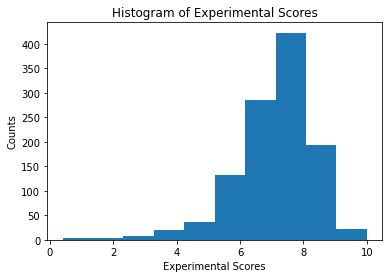

Experimental Music

count    1128.000000
mean        7.110461
std         1.239213
min         0.400000
25%         6.600000
50%         7.300000
75%         7.900000
max        10.000000
Name: score, dtype: float64


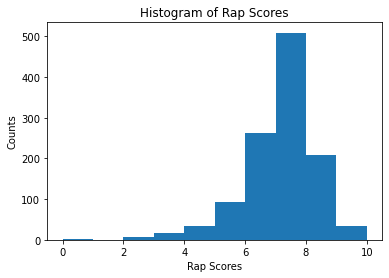

Rap Music

count    1165.000000
mean        7.112361
std         1.173937
min         0.000000
25%         6.600000
50%         7.300000
75%         7.800000
max        10.000000
Name: score, dtype: float64


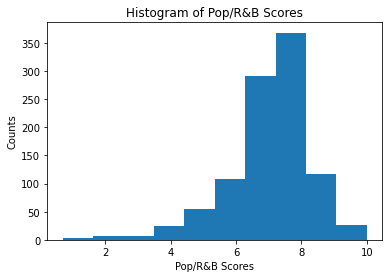

Pop/R&B Music 

count    1005.000000
mean        7.044279
std         1.278897
min         0.700000
25%         6.500000
50%         7.300000
75%         7.800000
max        10.000000
Name: score, dtype: float64


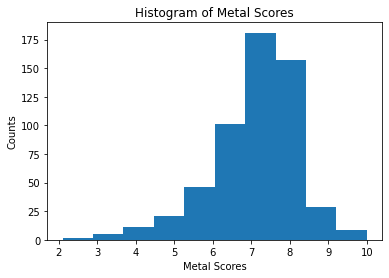

Pop/R&B Music

count    562.000000
mean       7.111922
std        1.110178
min        2.100000
25%        6.600000
50%        7.300000
75%        7.800000
max       10.000000
Name: score, dtype: float64


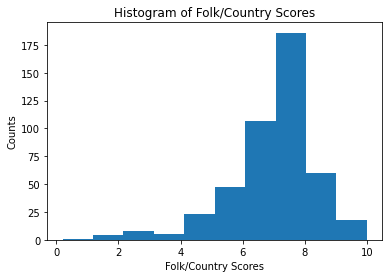

Folk/Country Scores

count    459.000000
mean       7.053813
std        1.399221
min        0.200000
25%        6.450000
50%        7.300000
75%        7.900000
max       10.000000
Name: score, dtype: float64


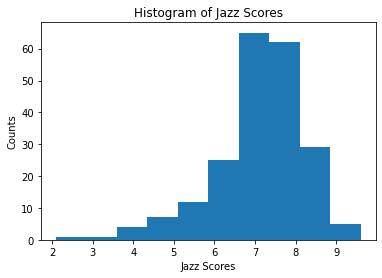

Jazz Scores

count    211.000000
mean       7.080095
std        1.146748
min        2.100000
25%        6.600000
50%        7.300000
75%        7.800000
max        9.600000
Name: score, dtype: float64


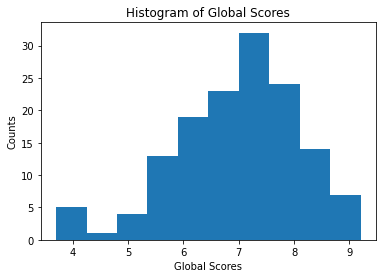

Global Scores
count    142.000000
mean       6.970423
std        1.118560
min        3.700000
25%        6.300000
50%        7.100000
75%        7.775000
max        9.200000
Name: score, dtype: float64


In [46]:
from matplotlib import pyplot as plt
plt.hist(data["score"], bins = 10)
plt.xlabel("Scores")
plt.ylabel("Counts")
plt.title("Histogram of all Scores")
plt.show()

#Rock Scores
rock = data [data["genre"] == "rock"]
plt.hist(rock["score"], bins = 10)
plt.xlabel("Rock Scores")
plt.ylabel("Counts")
plt.title("Histogram of Rock Scores")
plt.show()
print("Rock Description\n")
print( rock["score"].describe())

#Electronic Scores
electronic = data [data["genre"] == "electronic"]
plt.hist(electronic["score"], bins = 10)
plt.xlabel("Electronic Scores")
plt.ylabel("Counts")
plt.title("Histogram of Electronic Scores")
plt.show()
print("Electronic Description\n")
print( electronic["score"].describe() )

#Experimental
experimental = data [data["genre"] == "experimental"]
plt.hist(experimental["score"], bins = 10)
plt.xlabel("Experimental Scores")
plt.ylabel("Counts")
plt.title("Histogram of Experimental Scores")
plt.show()
print("Experimental Music\n")
print( experimental["score"].describe() )

#Rap
rap = data [data["genre"] == "rap"]
plt.hist(rap["score"], bins = 10)
plt.xlabel("Rap Scores")
plt.ylabel("Counts")
plt.title("Histogram of Rap Scores")
plt.show()
print("Rap Music\n")
print( rap["score"].describe() )

#Pop/R&B
pop_rb = data [data["genre"] == "pop/r&b"]
plt.hist(pop_rb["score"], bins = 10)
plt.xlabel("Pop/R&B Scores")
plt.ylabel("Counts")
plt.title("Histogram of Pop/R&B Scores")
plt.show()
print("Pop/R&B Music \n")
print( pop_rb["score"].describe() )

#Metal Scores
metal = data [data["genre"] == "metal"]
plt.hist(metal["score"], bins = 10)
plt.xlabel("Metal Scores")
plt.ylabel("Counts")
plt.title("Histogram of Metal Scores")
plt.show()
print("Pop/R&B Music\n")
print( metal["score"].describe() )

#Folk/Country Scores
folk_country = data [data["genre"] == "folk/country"]
plt.hist(folk_country["score"], bins = 10)
plt.xlabel("Folk/Country Scores")
plt.ylabel("Counts")
plt.title("Histogram of Folk/Country Scores")
plt.show()
print("Folk/Country Scores\n")
print( folk_country["score"].describe() )

#Jazz Scores
jazz = data [data["genre"] == "jazz"]
plt.hist(jazz["score"], bins = 10)
plt.xlabel("Jazz Scores")
plt.ylabel("Counts")
plt.title("Histogram of Jazz Scores")
plt.show()
print("Jazz Scores\n")
print( jazz["score"].describe())

#Global Scores
global_ = data [data["genre"] == "global"]
plt.hist(global_["score"], bins = 10)
plt.xlabel("Global Scores")
plt.ylabel("Counts")
plt.title("Histogram of Global Scores")
plt.show()
print("Global Scores")
print( global_["score"].describe() )

## Analysis on the bias

In [57]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f_value, p_value = stats.f_oneway(rock["score"],rap["score"],electronic["score"],experimental["score"], pop_rb["score"], metal["score"],folk_country["score"],
                                  jazz["score"], global_["score"])
if p_value < .05:
    print("Means are not equal " + str( format(p_value, '.10f')) + " Meaning that some bias is going on!")
else:
    print("Wait unbias? what?? P-value is " + str( format(p_value, '.10f')) )

Wait unbias? what?? P-value is 0.3246545755


In [53]:
#Gotta be sure
poc_hoc = pairwise_tukeyhsd(endog = data["score"], groups = data["genre"] ,alpha=.05)
print(poc_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
  electronic experimental   0.0617 0.9104 -0.0783 0.2017  False
  electronic folk/country    0.005    1.0 -0.1928 0.2029  False
  electronic       global  -0.0783 0.9985  -0.414 0.2573  False
  electronic         jazz   0.0313    1.0 -0.2477 0.3104  False
  electronic        metal   0.0632 0.9776 -0.1188 0.2451  False
  electronic      pop/r&b  -0.0045    1.0 -0.1503 0.1413  False
  electronic          rap   0.0636 0.8888 -0.0749 0.2021  False
  electronic         rock  -0.0203 0.9991 -0.1142 0.0737  False
experimental folk/country  -0.0566 0.9964 -0.2719 0.1586  False
experimental       global    -0.14  0.944 -0.4863 0.2062  False
experimental         jazz  -0.0304    1.0  -0.322 0.2613  False
experimental        metal   0.0015    1.0 -0.1993 0.2022  False
experimental      pop/r&b  -0.0662  0.95

# Could this be because of the many contributors?

In [60]:
data["author"].value_counts().head(n=5)

joe tangari           748
stephen m. deusner    634
ian cohen             600
brian howe            456
mark richardson       432
Name: author, dtype: int64

# Joe Tangari
Joe is the most well-known contributor for Pitchfork

In [72]:
joe = data[ data["author"] == "joe tangari"]
joe_hoc = pairwise_tukeyhsd(endog = joe["score"], groups = joe["genre"] ,alpha=.05)
print(joe_hoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
  electronic experimental   -0.066    1.0 -0.5551 0.4231  False
  electronic folk/country   0.1962 0.9944 -0.5061 0.8985  False
  electronic       global   0.0196    1.0 -0.9011 0.9403  False
  electronic         jazz   0.0879    1.0 -0.7504 0.9261  False
  electronic        metal  -0.4714 0.5085 -1.1866 0.2438  False
  electronic      pop/r&b   0.0178    1.0 -0.5374  0.573  False
  electronic          rap   0.1241 0.9976 -0.3768 0.6249  False
  electronic         rock    0.053 0.9999 -0.2651 0.3711  False
experimental folk/country   0.2622 0.9786 -0.5017 1.0262  False
experimental       global   0.0856    1.0 -0.8829 1.0541  False
experimental         jazz   0.1539 0.9998 -0.7366 1.0444  False
experimental        metal  -0.4053 0.7907 -1.1811 0.3704  False
experimental      pop/r&b   0.0838    1.

In [69]:
steph = data[ data["author"] == "stephen m. deusner"]
steph["genre"].value_counts()
steph_hoc = pairwise_tukeyhsd(endog = steph["score"], groups = steph["genre"] ,alpha=.05)
print(steph_hoc)

rock            322
electronic      115
rap              54
pop/r&b          48
experimental     45
folk/country     26
metal            12
jazz              6
global            6
Name: genre, dtype: int64

# How does the scores between fantano and Pitchfork compare?